In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("/content/cardekho.csv")
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (8128, 12)
                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner  mileage(km/ltr/kg)  engine  \
0  Individual       Manual   First Owner               23.40  1248.0   
1  Individual       Manual  Second Owner               21.14  1498.0   
2  Individual       Manual   Third Owner               17.70  1497.0   
3  Individual       Manual   First Owner               23.00  1396.0   
4  Individual       Manual   First Owner               16.10  1298.0   

  max_power  seats  
0        74    5.0  
1    103.52    5.0  
2        78    5.0  
3     

In [ ]:
if "name" in df.columns:
    df = df.drop(columns=["name"])

if "max_power" in df.columns:
    df["max_power"] = df["max_power"].astype(float)
    df["max_power"] = df["max_power"].fillna(df["max_power"].median())

for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

cat_cols = df.select_dtypes(include=["object"]).columns
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,2014,450000,145500,1,1,1,0,23.40,1248.0,244.0,5.0
1,2014,370000,120000,1,1,1,2,21.14,1498.0,15.0,5.0
2,2006,158000,140000,3,1,1,4,17.70,1497.0,253.0,5.0
3,2010,225000,127000,1,1,1,0,23.00,1396.0,295.0,5.0
4,2007,130000,120000,3,1,1,0,16.10,1298.0,287.0,5.0


In [26]:
X = df.drop("selling_price", axis=1)
y = df["selling_price"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R² Score:", r2_score(y_test, y_pred_lr))


Linear Regression Results:
MAE: 297458.7249859719
RMSE: 515722.29228828487
R² Score: 0.5942398226891792


In [30]:
param_grid = {
    "n_estimators": [100, 200, 500],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10]
}

grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring="r2",
    n_jobs=-1
)
grid.fit(X_train, y_train)

rf_best = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

y_pred_rf = rf_best.predict(X_test)

print("\nRandom Forest (Tuned) Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R² Score:", r2_score(y_test, y_pred_rf))


Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 500}

Random Forest (Tuned) Results:
MAE: 69399.39294663395
RMSE: 138044.21832128457
R² Score: 0.9709280571173132


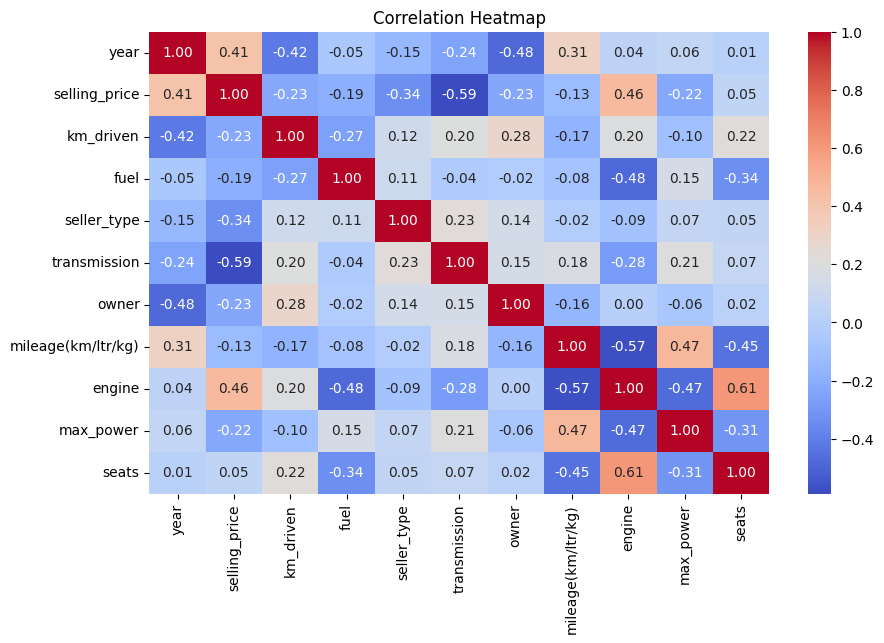

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


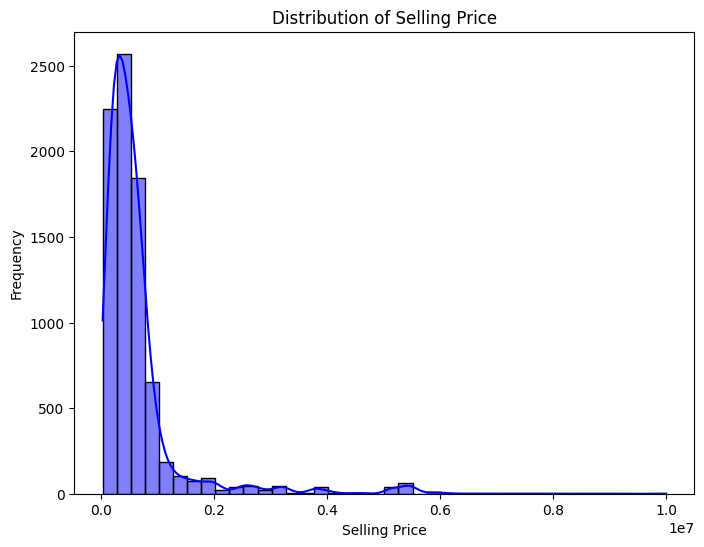

In [32]:
plt.figure(figsize=(8,6))
sns.histplot(df["selling_price"], kde=True, bins=40, color="blue")
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()

/tmp/ipython-input-2526498142.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="fuel", y="selling_price", data=df, estimator=np.mean, palette="viridis")


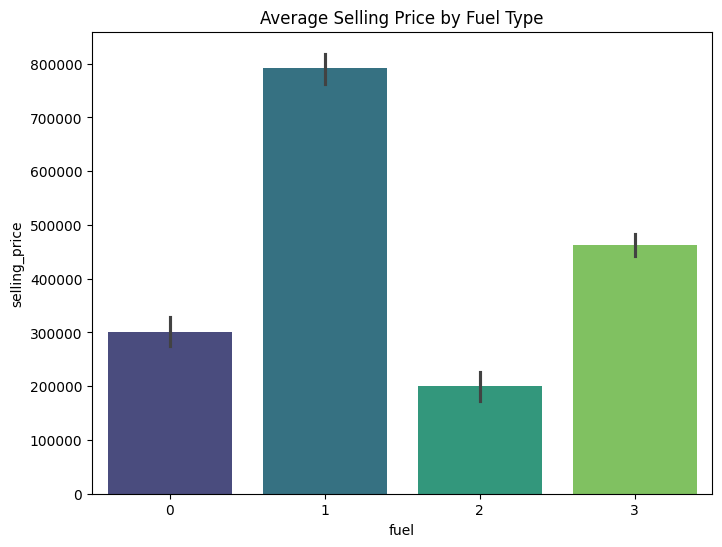

In [33]:
plt.figure(figsize=(8,6))
sns.barplot(x="fuel", y="selling_price", data=df, estimator=np.mean, palette="viridis")
plt.title("Average Selling Price by Fuel Type")
plt.show()

/tmp/ipython-input-1281638455.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="transmission", y="selling_price", data=df, palette="viridis")


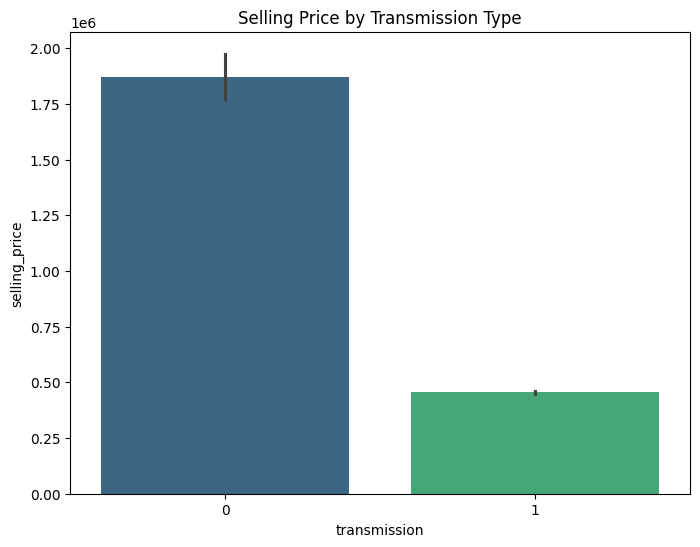

In [34]:
plt.figure(figsize=(8,6))
sns.barplot(x="transmission", y="selling_price", data=df, palette="viridis")
plt.title("Selling Price by Transmission Type")
plt.show()

/tmp/ipython-input-1667039653.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="seats", y="selling_price", data=df, palette="coolwarm")


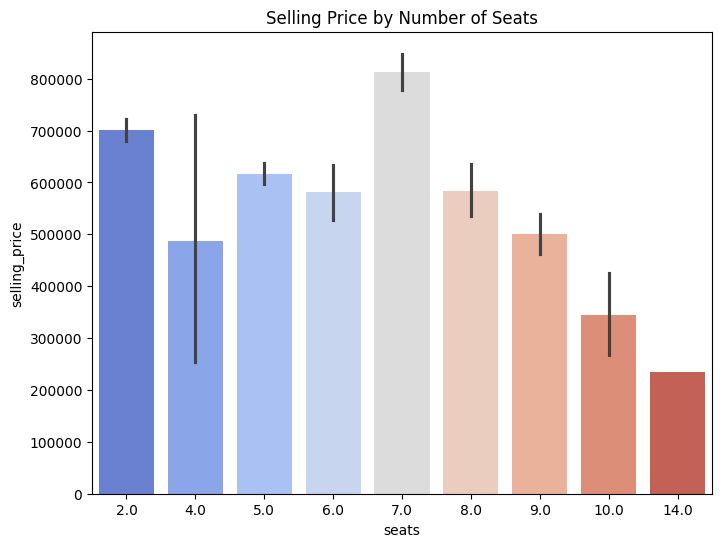

In [35]:
plt.figure(figsize=(8,6))
sns.barplot(x="seats", y="selling_price", data=df, palette="coolwarm")
plt.title("Selling Price by Number of Seats")
plt.show()

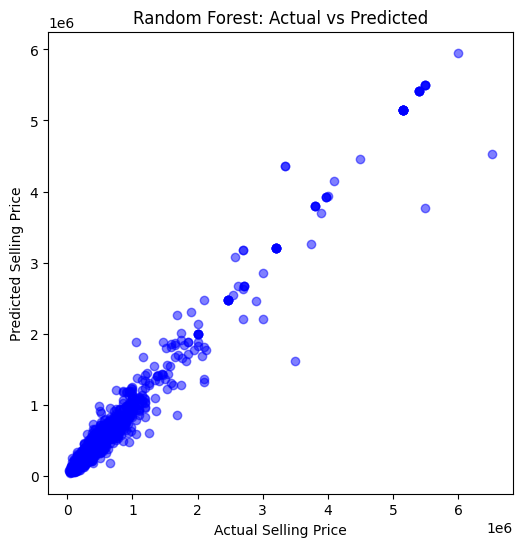

In [36]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, rf.predict(X_test), alpha=0.5, color='blue')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Random Forest: Actual vs Predicted")
plt.show()

/tmp/ipython-input-354403134.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="magma")


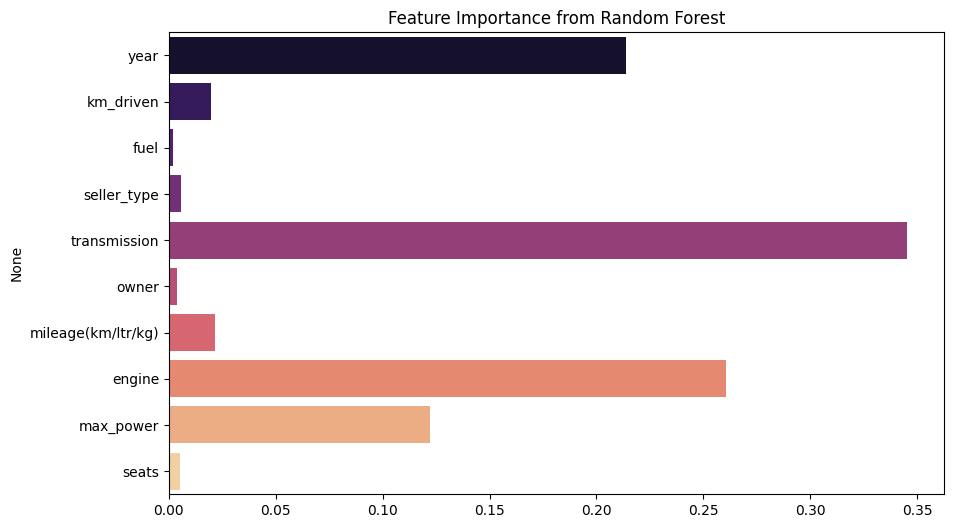

In [37]:
importances = rf_best.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features, palette="magma")
plt.title("Feature Importance from Random Forest")
plt.show()
